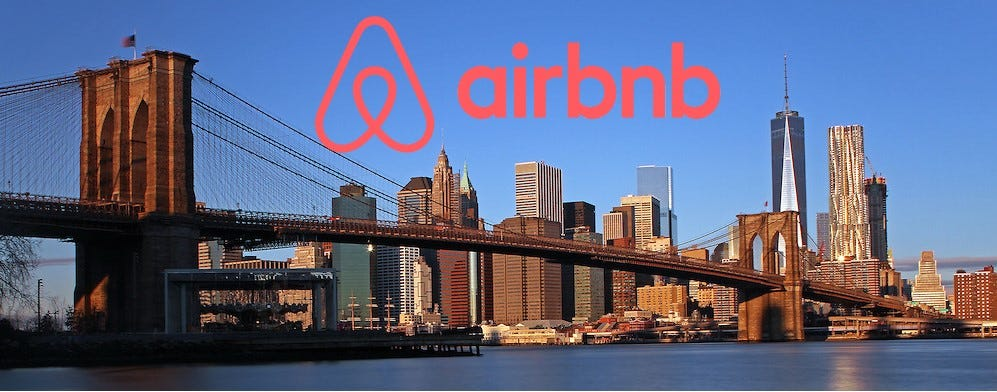

***
**Este projeto foi desenvolvido com o objetivo de explorar e analisar um conjunto de dados fascinante: as informa√ß√µes do AIRBNB em Nova York. A motiva√ß√£o para este trabalho vem do meu entusiasmo por trabalhar com dados e descobrir seus valores, como os que o AIRBNB pode oferecer.**

**Meu foco ser√° realizar um tratamento cuidadoso dos dados para garantir sua qualidade e integridade. Em seguida, aplicar t√©cnicas de regress√£o linear para identificar o modelo mais eficiente na previs√£o dos pre√ßos dos im√≥veis no AIRBNB. Esse processo n√£o s√≥ nos ajudar√° a entender melhor quais fatores influenciam os valores dos im√≥veis, mas tamb√©m a aprimorar nossas habilidades em an√°lise de dados e modelagem preditiva.**

**Atrav√©s deste projeto, buscamos n√£o apenas obter um modelo preditivo eficaz, mas tamb√©m demonstrar a import√¢ncia do tratamento de dados e da escolha adequada das t√©cnicas de an√°lise para obter resultados precisos e relevantes.**
***

# An√°lise e tratamento de dados




In [65]:
# Url do banco de dados que usaremos para esse data frame

url ='/content/AB_NYC_2019.csv'

In [66]:
# Importando a biblioteca Pandas

import pandas as pd

In [67]:
# Criando o DataFrame

df = pd.read_csv(url)

In [68]:
# Visualizando o Data Frame

df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [69]:
# Conferindo as informa√ß√µes do Data Frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Neste c√≥digo acima conferimos duas coisas muito importante para o nosso projeto o tipo de dados em cada coluna e se temos ou n√£o valores nulos. Notamos em algumas colunas como **name, host_name,last_review,reviews_per_month** que cont√©m dados nulos.

In [70]:
# Criando uma mascara para visualizar aonde estamos com os valores faltantes

null_mask = df[['name', 'host_name','last_review','reviews_per_month']].isnull()

null_mask

name  host_name  last_review  reviews_per_month
0      False      False        False              False
1      False      False        False              False
2      False      False         True               True
3      False      False        False              False
4      False      False        False              False
...      ...        ...          ...                ...
48890  False      False         True               True
48891  False      False         True               True
48892  False      False         True               True
48893  False      False         True               True
48894  False      False         True               True

[48895 rows x 4 columns]

In [71]:
# Criando um Data Frame para saber a quantidade da nulos nas colunas

df_null = df[['name', 'host_name','last_review','reviews_per_month']].isnull().sum().reset_index() # Criando o Data Frame
df_null.rename(columns={'index':'Columns',0:'Amount_null'},inplace= True) # Configurando os nomes das colunas
df_null

Columns  Amount_null
0               name           16
1          host_name           21
2        last_review        10052
3  reviews_per_month        10052

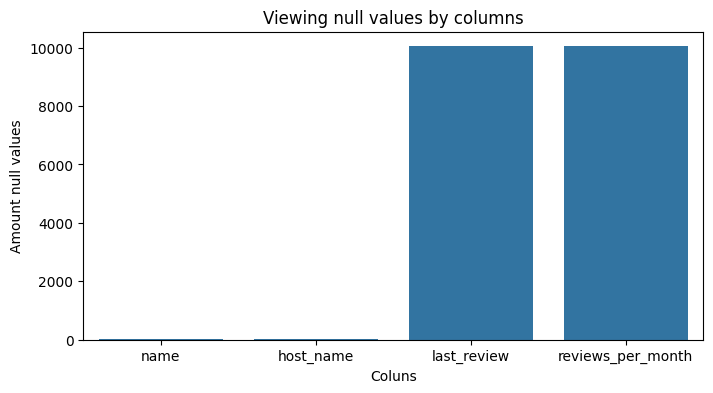

In [72]:
# Visualizando em gr√°ficos os valores nulos

# Importando as bibliotecas necess√°rias

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.barplot(data = df_null, x='Columns', y='Amount_null')
plt.title('Viewing null values by columns')
plt.xlabel('Coluns')
plt.ylabel('Amount null values')
plt.show()

O que n√≥s j√° tinhamos notado na Data Frame com a quantidade de valores nulos, confirmamos com o gr√°fico. Temos muitos valores nulos para as colunas **last_review** e **reviews_per_month**, nas colunas **name** e **host_name** n√£o temos muito valores nulos.

A coluna **reviews_per_month** iremos apagar do nosso Data Frame, pois n√£o o utilizaremos para o nosso projeto e cont√©m muito valores nulos. As colunas **name** e **host_name** n√£o utilizaremos no projeto, mas deixaremos elas por ter poucos valores nulos e pode ser uma forma de "etiquetar" em outras an√°lises.

J√° com a coluna **last_review** n√≥s simularemos as datas faltantes com base nas datas que temos em nosso Data Frame. Pois essa coluna ser√° importante no nosso projeto.

In [73]:
df[['last_review','reviews_per_month']]

last_review  reviews_per_month
0      2018-10-19               0.21
1      2019-05-21               0.38
2             NaN                NaN
3      2019-07-05               4.64
4      2018-11-19               0.10
...           ...                ...
48890         NaN                NaN
48891         NaN                NaN
48892         NaN                NaN
48893         NaN                NaN
48894         NaN                NaN

[48895 rows x 2 columns]

In [74]:
# Apagando a coluna 'reviews_per_month'

df.drop(columns=['reviews_per_month'],inplace=True)

In [75]:
# Conferindo o tipo de dados da coluna 'last_review'

print(df['last_review'].dtype)

object


A coluna 'last_review' por n√£o ser de datatime ter√° que ser convertido. Temos dois motivos o primeiro √© para conseguirmos preencher os valores faltantes com outras datas e o segundo motivo √© para an√°lise e previs√£o de serie temporal.

In [76]:
# Convertendo a coluna para datetime

df['last_review'] = pd.to_datetime(df['last_review'])

In [77]:
# Conferindo se convertemos corretamente

print(df['last_review'].dtype)

datetime64[ns]


In [78]:
# Obtendo os valores √∫nicos, excluindo os NaN

unique_data = df['last_review'].dropna().unique()
print(len(unique_data))

1764


In [79]:
# Preenchendo os valores faltantes da coluna 'last_review'

# Importando a biblioteca necess√°ria
import numpy as np

# Criando uma fun√ß√£o para gerar um data entre duas datas

def random_date(start_date, end_date):
  return start_date + pd.to_timedelta(np.random.randint(0,(end_date - start_date).days),unit='D')
    # Ir√° retnornar o start_date mais um valor aleat√≥rio que estar√° entre 0, start_date e o end_date e formatado para dias

# Fun√ß√£o para preencher valores nulos com as datas aleat√≥rias dentro do intervalo

def fillna_with_random(df,column ):
  df_copy = df.copy() # Fazendo uma c√≥pia do data frame original

  # Encontrar o intervalo de datas existentes

  min_date = df_copy[column].min()
  max_date = df_copy[column].max()

  # Preencher os valores auxentes com datas aleat√≥rias dentro do intervalo

  df_copy[column] = df_copy[column].apply(lambda x: random_date(min_date,max_date) if pd.isnull(x) else x)
    # Nesta fun√ß√£o lambda irei utilizar o data frame copiado
    # Utilizarei o lambda para pegar o x aleat√≥rio entre a data m√≠nima e m√°xima
    # A data aleat√≥rio substituio valor nulo, se o valor n√£o for nulo ele permanecer√° inalterado

  return df_copy # Retornar a fun√ß√£o

In [80]:
# Aplicando a fun√ß√£o fillna_with_random no nosso data frame original

df = fillna_with_random(df,'last_review') # Para essa fun√ß√£o primeiro passamos o Data Frame e depois a coluna que iremos alterar

Eu tentei preencher os dados vazios da coluna **last_review** com **bfill** e depois com **ffill**.

Por√©m com o **bfill** que preenche o dado faltante com a data anterior ainda tive como resultado de 42 dados faltantes.
E utilizando **ffill** para preencer o dado faltante com a data posterior tive como resultado muitos dados repetidos.

Portanto a melhor forma que eu encontrei foi fazer o preenchimento de dados faltantes de uma forma aleat√≥ria. Utilizei o maior e a menor data para criar um intervalo e coloquei de forma aleat√≥ria para utilizar esse intervalo para preencher os dados

In [81]:
# Conferindo se todos os dados nulosda coluna last_review foram tratados

df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [82]:
# Conferindo a repeti√ß√£o entre os dados da coluna last_review

unique_data_1 = df['last_review'].unique() # Criando um array da coluna last_review apenas com os valores unicos dela
print(len(unique_data_1))

2981


***
Valores unicos na coluna last_review antes do tratamento: 1764

Valores unicos na coluna last_review depois do tratamento: 2981
***

Essa diferen√ßa √© um √≥timo resultado para n√≥s, isso mostra que inserimos valores √∫nicos e n√£o preenchemos os dados nulos com repeti√ß√µes

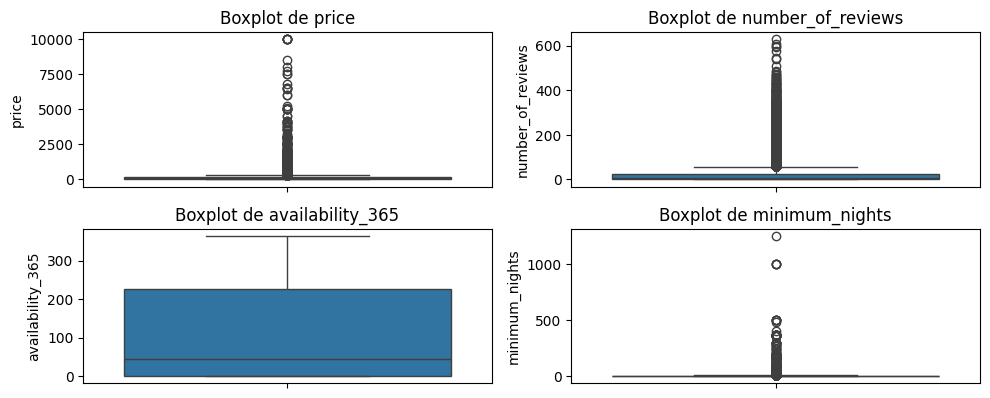

In [83]:
# Conferindo se possuimos outliers

# Visualizando os dados com boxplot para indentificar poss√≠veis outliers

plt.figure(figsize=(10,6)) # Configurando o tamanho do gr√°fico

# Escolhendo as colunas que iremos conferir os outliers

columns_to_check = ['price','number_of_reviews','availability_365','minimum_nights']

# Iterando para plotar os boxplots

for i, column in enumerate (columns_to_check,1):
  plt.subplot(3,2,i) # Criando os sub gr√°ficos
  sns.boxplot(y=df[column]) # Colocando a coluna para o boxplot
  plt.title(f'Boxplot de {column}') # Configurando o t√≠tulo

plt.tight_layout() # Para nenhum gr√°fico invadir o espa√ßo do outro
plt.show()

In [84]:
df.price.unique()

array([  149,   225,   150,    89,    80,   200,    60,    79,   135,
          85,   120,   140,   215,    99,   190,   299,   130,   110,
          44,   180,    50,    52,    55,    70,    35,    40,    68,
         115,   151,   228,   144,    69,    49,   375,   250,   275,
         230,    51,    65,   105,    95,   145,   285,    94,   800,
         131,    98,   100,   125,   175,   500,   101,   220,    59,
         350,   199,   325,   235,   170,   400,    75,    90,   185,
          77,    76,   160,   195,   156,   219,   475,   165,   196,
          83,   123,   265,   249,   121,    45,    71,    64,   159,
         189,   239,   305,   155,    92,    36,    37,   205,    39,
         390,   129,   212,   124,   122,   109,   575,   229,   169,
         113,   179,   349,   139,   650,    67,   599,   211,   290,
          87,   395,   260,    97,   132,   141,   495,   259,    96,
         295,   451,   300,    42,   255,    72,    88,   450,   198,
          46,    33,

In [85]:
df.number_of_reviews.unique()

array([  9,  45,   0, 270,  74,  49, 430, 118, 160,  53, 188, 167, 113,
        27, 148, 198, 260, 130,  39,  71,  88,  19,  58, 108,  29, 242,
       197, 273, 168, 231, 214, 245,  15,  25,  81,  97,  11, 248,  61,
       135, 112,  73,  82, 328, 105, 289, 138,  21,  42,   5,  66, 143,
       191,   4, 338, 106, 190,  23, 142,  54,  70,  16,  94, 194,   2,
       174,  24, 166,   1,  30, 139, 233,  68,  46, 335, 162, 170, 334,
        12, 467,   7,  38, 324, 115, 354, 195,  13,  36,  63, 155, 193,
        32,  50,  26, 426, 227,  84,   3,  10, 124, 240, 200,  79,  34,
       134, 126, 234, 202,  28, 309,  14,  80, 294, 150,  47, 219, 114,
       213,  86,  18, 206, 122,  33,  52,  51, 199,  41, 109, 151, 285,
       375,   6, 358, 226, 104, 204, 253, 129,  37,  69, 192,  17, 222,
       205, 458, 183, 189, 127,  35, 171,  92, 238,  56, 111, 147, 177,
       185,  62, 181, 333, 441, 279, 203, 210,  64, 132,  20,  67, 187,
        22,  93,  48, 120,  43,  59,  31, 220, 286, 398,  76, 18

In [86]:
df.minimum_nights.unique()

array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
         99,  160,   47,  999,  186,  366,   68,   93,   87,  183,  299,
        175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
        153,  134,  222,   58,  210,  275,  182,  114,   85,   36])

Faremos alguns gr√°ficos para conferirmos o comportamento das vari√°veis e tamb√©m utilizaremos estat√≠stica descritiva para confirmarmos a presen√ßa de outliers

In [87]:
# Estast√≠stica descritiva

price_stats = df['price'].describe()
review_stats = df['number_of_reviews'].describe()
nights_stats = df['minimum_nights'].describe()


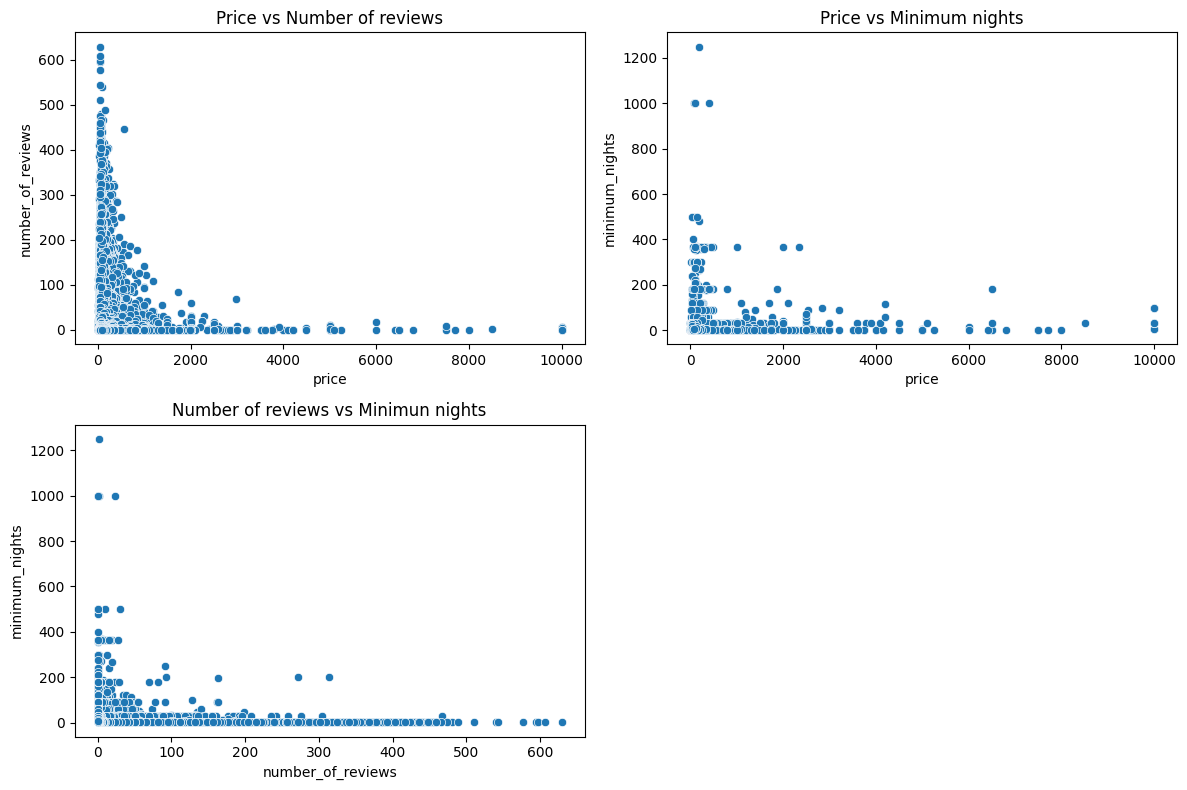

In [88]:
# Plotando gr√°fico para conferir a rela√ß√£o entre as vari√°veis

plt.figure(figsize=(12,8)) # Tamanho do gr√°fico

plt.subplot(2,2,1) # Dividindo o espa√ßo para o gr√°fico
sns.scatterplot(x=df['price'],y=df['number_of_reviews']) # Colocando as vari√°veis para esse gr√°fico
plt.title('Price vs Number of reviews') # T√≠tulo do gr√°fico

plt.subplot(2,2,2)
sns.scatterplot(x=df['price'],y=df['minimum_nights'])
plt.title('Price vs Minimum nights')


plt.subplot(2,2,3)
sns.scatterplot(x=df['number_of_reviews'], y = df['minimum_nights'])
plt.title('Number of reviews vs Minimun nights')

plt.tight_layout() # Para nenhum gr√°fico oculpar o lugar do outro
plt.show() # Mostrar o gr√°fico

Com o auxilio desse gr√°fico podemos ter certeza que s√£o outliers, pois n√£o h√° um crescimento junto.

Outro fator √© que existem casas com pre√ßo igual a zero ou muito proximo e com muitas avalia√ß√µes, por exemplo.  

***

Vari√°vel price

In [89]:
print(f'Estat√≠stica de pre√ßo:\n{price_stats}')

Estat√≠stica de pre√ßo:
count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


**An√°lise de Pre√ßo**

*Distribui√ß√£o do Pre√ßo:*

M√©dia (Mean): O pre√ßo m√©dio dos im√≥veis √© 152,72, o que fornece uma no√ß√£o geral do custo m√©dio.

Desvio Padr√£o (Std): O alto desvio padr√£o de 240,15 indica que h√° uma grande varia√ß√£o nos pre√ßos dos im√≥veis.

Valores Extremos: O pre√ßo m√≠nimo √© 0 e o m√°ximo √© 10.000, sugerindo a presen√ßa de valores discrepantes (outliers).

Quartis: O pre√ßo mediano (50¬∫ percentil) √© 106, que √© menor que a m√©dia, o que pode sugerir uma distribui√ß√£o de pre√ßos assim√©trica, com a maioria dos pre√ßos abaixo da m√©dia.

***

Vari√°vel number_of_reviews

In [90]:
print(f'Estat√≠stica do N√∫mero de Avalia√ß√µes:\n{review_stats}')

Estat√≠stica do N√∫mero de Avalia√ß√µes:
count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64


**An√°lise do N√∫mero de Avalia√ß√µes**
*Distribui√ß√£o das Avalia√ß√µes:*

M√©dia (Mean): A m√©dia de avalia√ß√µes √© 23,27, mas o desvio padr√£o √© 44,55, indicando que a maioria dos im√≥veis tem um n√∫mero de avalia√ß√µes muito menor que a m√©dia.

Quartis: A mediana √© 5, o que sugere que metade dos im√≥veis tem 5 ou menos avalia√ß√µes. A presen√ßa de um valor m√°ximo de 629 indica que alguns im√≥veis t√™m um n√∫mero muito alto de avalia√ß√µes.

***

Vari√°vel minimum_nights

In [91]:
print(f'Estat√≠stica de Noites M√≠nimas:\n{nights_stats}')

Estat√≠stica de Noites M√≠nimas:
count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


**An√°lise das Noites M√≠nimas**

*Distribui√ß√£o das Noites M√≠nimas:*

M√©dia (Mean): A m√©dia √© 7,03, mas o desvio padr√£o √© 20,51, sugerindo que h√° uma grande varia√ß√£o no n√∫mero de noites m√≠nimas exigidas.

Quartis: A mediana √© 3, o que indica que metade dos im√≥veis exige 3 ou menos noites m√≠nimas. O valor m√°ximo de 1250 sugere a presen√ßa de algumas regras extremamente restritivas.

***

Confirmamos a presen√ßa de outliers atrav√©s de visualiza√ß√£o gr√°fica e estat√≠stica descritiva.
Agora nosso pr√≥ximo ser√° de trata-los

Usaremos uma t√©cnica chamada **Capping**, que √© limitarmos os valores extremos aos limites superiores e inferiores.

Assim n√£o perderemos informa√ß√µes importante

In [92]:
# Aplicando Capping para os outliers

def cap_outliers(df,column):
  Q1 = df[column].quantile(.25) # Primeiro quartil
  Q3 = df[column].quantile(.75) # Terceiro quartil

  IQR = Q3 -Q1 # Diferen√ßa entre o primeiro e terceiro quartil

  lower_bound = Q1 - 1.5 * IQR # Valor m√≠nimo antes de ser outlier
  upper_bound = Q3 + 1.5 * IQR # Valor m√°ximo antes de ser outlier

  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column]) # Encontrando valores menores que o permitido e substituindo pelos m√≠nimos permitido
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column]) # Encontrando valores maiores que o permitido e substituindo pelos m√°ximos permitido

  return df # Retornar a fun√ß√£o

In [93]:
# Criando uma lista com as colunas para as altera√ß√µes

columns_to_cap = ['price','number_of_reviews','minimum_nights']

In [94]:
# Aplicando a fun√ß√£o

df = cap_outliers(df, columns_to_cap)

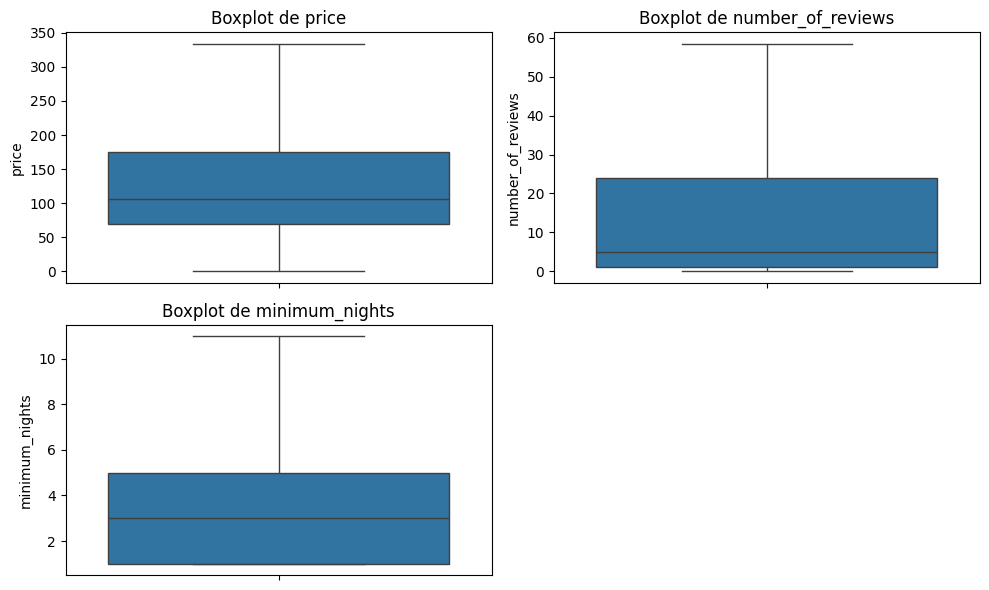

In [95]:
# Conferindo se os outliers persistem

# Visualizando os dados com boxplot para indentificar poss√≠veis outliers

plt.figure(figsize=(10,6)) # Configurando o tamanho do gr√°fico

# Escolhendo as colunas que iremos conferir os outliers

columns_to_check = ['price','number_of_reviews','minimum_nights']

# Iterando para plotar os boxplots

for i, column in enumerate (columns_to_check,1):
  plt.subplot(2,2,i) # Criando os sub gr√°ficos
  sns.boxplot(y=df[column]) # Colocando a coluna para o boxplot
  plt.title(f'Boxplot de {column}') # Configurando o t√≠tulo

plt.tight_layout() # Para nenhum gr√°fico invadir o espa√ßo do outro
plt.show()

Agora podemos seguir mais tranquilos com outliers tratados.

Falta apenas mais um passo para o tratamento de dados, que √© a t√©cnica **One-Hot Encoding** que consiste em transformar vari√°veis categoricas em bin√°rias.

In [96]:
# Aplicando o One_hot Encoding

df_one_hot = pd.get_dummies(df, columns=['neighbourhood_group', 'neighbourhood', 'room_type'])
# Criei outro data frame para ter mais seguran√ßa se precisarmos das colunas no outro formato


In [97]:
# Visualizando o novo data frame

df_one_hot.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name  latitude  longitude  price  minimum_nights  number_of_reviews  \
0         John  40.64749  -73.97237  149.0             1.0                9.0   
1     Jennifer  40.75362  -73.98377  225.0             1.0               45.0   
2    Elisabeth  40.80902  -73.94190  150.0             3.0                0.0   
3  LisaRoxanne  40.68514  -73.95976   89.0             1.0               58.5   
4        Laura  40.79851  -73.94399   80.0            10.0                9.0   

  last_review  ...  neighbourhood_Williamsburg  neighbourhood_Willowbrook  \
0  2018-10-19  ...                       False                      False   
1  2019-05-21  ...                       False                      False   
2  2012-11-01  ...                       False                      False   
3  2019-07-05  ...                       False                      False   
4  2018-11-19  ...                       False                      False   

   neighbourhood_Windsor Terrace  neighbourhood_Woodhaven  \
0                          False                    False   
1                          False                    False   
2                          False                    False   
3                          False                    False   
4                          False                    False   

   neighbourhood_Woodlawn  neighbourhood_Woodrow  neighbourhood_Woodside  \
0                   False                  False                   False   
1                   False                  False                   False   
2                   False                  False                   False   
3                   False                  False                   False   
4                   False                  False                   False   

   room_type_Entire home/apt  room_type_Private room  room_type_Shared room  
0                      False                    True                  False  
1                       True                   False                  False  
2                      False                    True                  False  
3                       True                   False                  False  
4                       True                   False                  False  

[5 rows x 241 columns]

Como foi criado muitas colunas ao usar a t√©cnica de One-Hot Encoding, para diminuir a alta dimensionalidade e efici√™ncia computacional.

Irei excluir as colunas derivadas da vari√°vel **neighbourhood**. Para isso eu usarei um filtro em rela√ß√£o as colunas que come√ßam com esse nome, pois usando **get_dummies** mant√©m o nome original diferenciando no restante dele

In [98]:
# Filtrando as colunas que come√ßam com neighbourhood

neighbourhood_cols = df_one_hot.filter(like='neighbourhood_').columns

# Filtrando as colunas que come√ßam com neighbourhood mas n√£o √© para apagar, pois se refere a coluna neighbourhood_group

cols_to_drop = [col for col in neighbourhood_cols if 'neighbourhood_group' not in col]
    # Vamos iterar sobre cada coluna que cont√©m 'neighbourhood_' no nome e,
    # se a coluna n√£o estiver relacionada ao 'neighbourhood_group', ela ser√° adicionada √† lista 'cols_to_drop',
    # que ser√° usada para eliminar essas colunas permanentemente do data frame


cols_to_drop

['neighbourhood_Allerton',
 'neighbourhood_Arden Heights',
 'neighbourhood_Arrochar',
 'neighbourhood_Arverne',
 'neighbourhood_Astoria',
 'neighbourhood_Bath Beach',
 'neighbourhood_Battery Park City',
 'neighbourhood_Bay Ridge',
 'neighbourhood_Bay Terrace',
 'neighbourhood_Bay Terrace, Staten Island',
 'neighbourhood_Baychester',
 'neighbourhood_Bayside',
 'neighbourhood_Bayswater',
 'neighbourhood_Bedford-Stuyvesant',
 'neighbourhood_Belle Harbor',
 'neighbourhood_Bellerose',
 'neighbourhood_Belmont',
 'neighbourhood_Bensonhurst',
 'neighbourhood_Bergen Beach',
 'neighbourhood_Boerum Hill',
 'neighbourhood_Borough Park',
 'neighbourhood_Breezy Point',
 'neighbourhood_Briarwood',
 'neighbourhood_Brighton Beach',
 'neighbourhood_Bronxdale',
 'neighbourhood_Brooklyn Heights',
 'neighbourhood_Brownsville',
 "neighbourhood_Bull's Head",
 'neighbourhood_Bushwick',
 'neighbourhood_Cambria Heights',
 'neighbourhood_Canarsie',
 'neighbourhood_Carroll Gardens',
 'neighbourhood_Castle Hill',


In [99]:
# Eliminando essas colunas do data frame

df_one_hot.drop(columns=cols_to_drop,inplace=True)

In [100]:
# Visualizando o data frame

df_one_hot.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name  latitude  longitude  price  minimum_nights  number_of_reviews  \
0         John  40.64749  -73.97237  149.0             1.0                9.0   
1     Jennifer  40.75362  -73.98377  225.0             1.0               45.0   
2    Elisabeth  40.80902  -73.94190  150.0             3.0                0.0   
3  LisaRoxanne  40.68514  -73.95976   89.0             1.0               58.5   
4        Laura  40.79851  -73.94399   80.0            10.0                9.0   

  last_review  calculated_host_listings_count  availability_365  \
0  2018-10-19                               6               365   
1  2019-05-21                               2               355   
2  2012-11-01                               1               365   
3  2019-07-05                               1               194   
4  2018-11-19                               1                 0   

   neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                      False                          True   
1                      False                         False   
2                      False                         False   
3                      False                          True   
4                      False                         False   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                          False                       False   
1                           True                       False   
2                           True                       False   
3                          False                       False   
4                           True                       False   

   neighbourhood_group_Staten Island  room_type_Entire home/apt  \
0                              False                      False   
1                              False                       True   
2                              False                      False   
3                              False                       True   
4                              False                       True   

   room_type_Private room  room_type_Shared room  
0                    True                  False  
1                   False                  False  
2                    True                  False  
3                   False                  False  
4                   False                  False

In [101]:
# Conferindo a quantidade de colunas

len(df_one_hot.columns)

20

Depois desse tratamento diminuimos o n√∫mero de colunas de **241** para **20**

***
Agora com os dados tratados podemos fazer **Regress√£o Linear** e **predi√ß√£o de s√©ries temporais**
***

# Regress√£o Linear

**Objetivo ser√° identificar as vari√°veis com a melhor rela√ß√£o com a vari√°vel `price`**

In [102]:
# Criando uma Data Frame para o projeto de regress√£o

regression_df = df_one_hot.copy()

In [103]:
# Visualizando o Data Frame, para saber quais colunas ser√£o √∫teis neste momento

regression_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name  latitude  longitude  price  minimum_nights  number_of_reviews  \
0         John  40.64749  -73.97237  149.0             1.0                9.0   
1     Jennifer  40.75362  -73.98377  225.0             1.0               45.0   
2    Elisabeth  40.80902  -73.94190  150.0             3.0                0.0   
3  LisaRoxanne  40.68514  -73.95976   89.0             1.0               58.5   
4        Laura  40.79851  -73.94399   80.0            10.0                9.0   

  last_review  calculated_host_listings_count  availability_365  \
0  2018-10-19                               6               365   
1  2019-05-21                               2               355   
2  2012-11-01                               1               365   
3  2019-07-05                               1               194   
4  2018-11-19                               1                 0   

   neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
0                      False                          True   
1                      False                         False   
2                      False                         False   
3                      False                          True   
4                      False                         False   

   neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
0                          False                       False   
1                           True                       False   
2                           True                       False   
3                          False                       False   
4                           True                       False   

   neighbourhood_group_Staten Island  room_type_Entire home/apt  \
0                              False                      False   
1                              False                       True   
2                              False                      False   
3                              False                       True   
4                              False                       True   

   room_type_Private room  room_type_Shared room  
0                    True                  False  
1                   False                  False  
2                    True                  False  
3                   False                  False  
4                   False                  False

In [104]:
# Dados que n√£o ser√£o √∫teis neste projeto

regression_df.drop(columns=['id','name','host_name','host_id'],inplace=True)

In [105]:
# Confirmando as informa√ß√µes do Data Frame para podermos d√°r prosseguimento no projeto

regression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   latitude                           48895 non-null  float64       
 1   longitude                          48895 non-null  float64       
 2   price                              48895 non-null  float64       
 3   minimum_nights                     48895 non-null  float64       
 4   number_of_reviews                  48895 non-null  float64       
 5   last_review                        48895 non-null  datetime64[ns]
 6   calculated_host_listings_count     48895 non-null  int64         
 7   availability_365                   48895 non-null  int64         
 8   neighbourhood_group_Bronx          48895 non-null  bool          
 9   neighbourhood_group_Brooklyn       48895 non-null  bool          
 10  neighbourhood_group_Manhattan     

In [106]:
# Excluirei as colunas latitude e longitude, pois s√£o duas colunas muito espec√≠ficas e de dif√≠l interpreta√ß√£o

regression_df.drop(columns=['latitude','longitude'],inplace=True)

Com as colunas necess√°rias, em formatos corretos e sem dados nulos podemos progredir no projeto

In [107]:
#  Correla√ß√£o entre as vari√°veis

corr = regression_df.corr()
corr

price  minimum_nights  \
price                              1.000000        0.053365   
minimum_nights                     0.053365        1.000000   
number_of_reviews                 -0.066363       -0.210292   
last_review                       -0.063783       -0.141064   
calculated_host_listings_count     0.162565        0.235167   
availability_365                   0.112730        0.156883   
neighbourhood_group_Bronx         -0.091649       -0.049473   
neighbourhood_group_Brooklyn      -0.194636       -0.038368   
neighbourhood_group_Manhattan      0.338258        0.106266   
neighbourhood_group_Queens        -0.172471       -0.076530   
neighbourhood_group_Staten Island -0.040406       -0.024198   
room_type_Entire home/apt          0.588101        0.158882   
room_type_Private room            -0.550827       -0.149464   
room_type_Shared room             -0.127794       -0.032390   

                                   number_of_reviews  last_review  \
price                                      -0.066363    -0.063783   
minimum_nights                             -0.210292    -0.141064   
number_of_reviews                           1.000000     0.439628   
last_review                                 0.439628     1.000000   
calculated_host_listings_count             -0.100799    -0.063323   
availability_365                            0.191100     0.159995   
neighbourhood_group_Bronx                   0.021768     0.024216   
neighbourhood_group_Brooklyn                0.025513     0.032237   
neighbourhood_group_Manhattan              -0.065793    -0.072490   
neighbourhood_group_Queens                  0.045661     0.045769   
neighbourhood_group_Staten Island           0.026412     0.022068   
room_type_Entire home/apt                  -0.001734     0.004173   
room_type_Private room                      0.009264    -0.001456   
room_type_Shared room                      -0.024630    -0.008934   

                                   calculated_host_listings_count  \
price                                                    0.162565   
minimum_nights                                           0.235167   
number_of_reviews                                       -0.100799   
last_review                                             -0.063323   
calculated_host_listings_count                           1.000000   
availability_365                                         0.225701   
neighbourhood_group_Bronx                               -0.022511   
neighbourhood_group_Brooklyn                            -0.123234   
neighbourhood_group_Manhattan                            0.152842   
neighbourhood_group_Queens                              -0.033881   
neighbourhood_group_Staten Island                       -0.012838   
room_type_Entire home/apt                                0.112193   
room_type_Private room                                  -0.108945   
room_type_Shared room                                   -0.011737   

                                   availability_365  \
price                                      0.112730   
minimum_nights                             0.156883   
number_of_reviews                          0.191100   
last_review                                0.159995   
calculated_host_listings_count             0.225701   
availability_365                           1.000000   
neighbourhood_group_Bronx                  0.060806   
neighbourhood_group_Brooklyn              -0.079671   
neighbourhood_group_Manhattan             -0.005434   
neighbourhood_group_Queens                 0.087113   
neighbourhood_group_Staten Island          0.057885   
room_type_Entire home/apt                 -0.006804   
room_type_Private room                    -0.010986   
room_type_Shared room                      0.058294   

                                   neighbourhood_group_Bronx  \
price                                              -0.091649   
minimum_nights                                     -0.049473   
nu

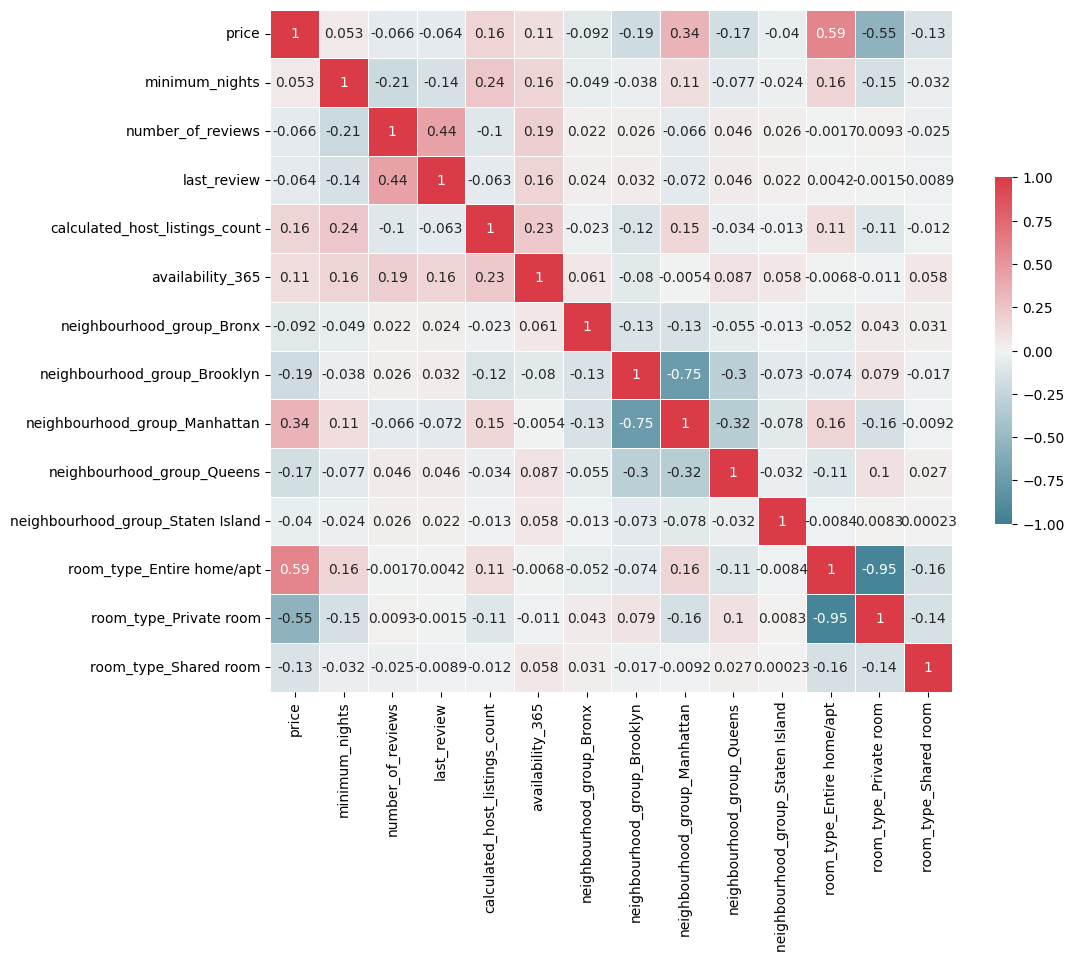

In [108]:
# Apresentando a correla√ß√£o em gr√°fico para facilitar a visualiza√ß√£o

# Importando as bibliotecas necess√°rias

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando a figura do matplotlib

f,ax = plt.subplots(figsize=(11,9))

# Gerando o mapa de calor

cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(corr, cmap = cmap,
            vmax=1, vmin=-1, center=0, square=True, linewidths = .5, annot = True,
            cbar_kws={'shrink':.5})

# Exibir o mapa de calor(heatmap)

plt.show()

In [109]:
# Correla√ß√£o das demais vari√°veis em rela√ß√£o com a vari√°vel price

price_corr = corr[['price']].sort_values(by='price', ascending = False)
price_corr.rename(columns={'price':'correlation'},inplace = True) # Alterando o nome da coluna
price_corr.drop(index='price',inplace=True) # Retirando a linha price que obviamente ser√° 1


In [110]:
# Conferindo o data frame

price_corr

correlation
room_type_Entire home/apt             0.588101
neighbourhood_group_Manhattan         0.338258
calculated_host_listings_count        0.162565
availability_365                      0.112730
minimum_nights                        0.053365
neighbourhood_group_Staten Island    -0.040406
last_review                          -0.063783
number_of_reviews                    -0.066363
neighbourhood_group_Bronx            -0.091649
room_type_Shared room                -0.127794
neighbourhood_group_Queens           -0.172471
neighbourhood_group_Brooklyn         -0.194636
room_type_Private room               -0.550827

Neste estudo de correla√ß√£o notamos que as var√°veis que possuem uma correla√ß√£o positiva com a vari√°vel de estudo s√£o as vari√°veis:


  *   **room_type_Entire home/apt**;
  *   **neighbourhood_group_Manhattan**;
  *   **calculated_host_listings_count**;
  *   **availability_365**;
  *   **minimum_nights**


***


**Explicando as vari√°veis:**



1.   **room_type_Entire home/apt** -> Esta vari√°vel indica se o im√≥vel √© uma casa inteira ou um apartamento. Geralmente, im√≥veis inteiros tendem a ter um pre√ßo mais alto comparado a quartos compartilhados ou privados. Isso se deve ao fato de que a privacidade e o espa√ßo adicional proporcionados por um im√≥vel inteiro s√£o frequentemente valorizados mais pelos h√≥spedes, resultando em um pre√ßo mais elevado. Correla√ß√£o de **0.58**
2.   **neighbourhood_group_Manhattan** -> Esta vari√°vel indica se o im√≥vel est√° localizado no bairro de Manhattan. A presen√ßa em Manhattan est√° associada a pre√ßos mais altos devido ao alto custo de vida e √† demanda significativa por acomoda√ß√µes nesta √°rea central de Nova York. Correla√ß√£o de **0.33**
3.   **calculated_host_listings_count** ->Esta vari√°vel reflete o n√∫mero de listagens que um anfitri√£o possui. Um n√∫mero maior de listagens pode estar associado a uma maior experi√™ncia e reputa√ß√£o do anfitri√£o, o que pode contribuir para um aumento no pre√ßo. No entanto, o impacto exato dessa vari√°vel no pre√ßo pode variar dependendo de outros fatores, como a qualidade das listagens e a demanda geral. Correla√ß√£o de **0.16**
4.   **availability_365** ->Esta vari√°vel representa o n√∫mero de dias dispon√≠veis no ano para o im√≥vel. Im√≥veis com alta disponibilidade podem ser mais flex√≠veis em termos de reservas, o que pode influenciar o pre√ßo. A rela√ß√£o positiva indica que uma maior disponibilidade est√° associada a pre√ßos mais altos. Correla√ß√£o de **0.11**
5.   **minimum_nights** -> Esta vari√°vel define o n√∫mero m√≠nimo de noites que um h√≥spede deve reservar. A correla√ß√£o com o pre√ßo √© relativamente baixa, indicando que a exig√™ncia de um n√∫mero m√≠nimo de noites n√£o tem uma rela√ß√£o forte com o pre√ßo. Correla√ß√£o de **0.053**








***
As tr√™s var√°veis com as melhores correla√ß√µes:

  *   **room_type_Entire home/apt**;
  *   **neighbourhood_group_Manhattan**;
  *   **calculated_host_listings_count**
***

Agora vamos conferir as correla√ß√µes com testes

Para utilizarmos os algoritimos de Machine Learning precisamos das vari√°veis em numericas


In [111]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   price                              48895 non-null  float64       
 1   minimum_nights                     48895 non-null  float64       
 2   number_of_reviews                  48895 non-null  float64       
 3   last_review                        48895 non-null  datetime64[ns]
 4   calculated_host_listings_count     48895 non-null  int64         
 5   availability_365                   48895 non-null  int64         
 6   neighbourhood_group_Bronx          48895 non-null  bool          
 7   neighbourhood_group_Brooklyn       48895 non-null  bool          
 8   neighbourhood_group_Manhattan      48895 non-null  bool          
 9   neighbourhood_group_Queens         48895 non-null  bool          
 10  neighbourhood_group_Staten Island 

In [112]:
# Transformando as colunas bools em int
bools_cols = ['neighbourhood_group_Bronx','neighbourhood_group_Brooklyn','neighbourhood_group_Manhattan','neighbourhood_group_Queens','neighbourhood_group_Staten Island','room_type_Entire home/apt','room_type_Private room','room_type_Shared room']

# Fazendo a convers√£o

regression_df[bools_cols] = regression_df[bools_cols].astype(int)

In [113]:
# Confirmando as convers√µes

regression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   price                              48895 non-null  float64       
 1   minimum_nights                     48895 non-null  float64       
 2   number_of_reviews                  48895 non-null  float64       
 3   last_review                        48895 non-null  datetime64[ns]
 4   calculated_host_listings_count     48895 non-null  int64         
 5   availability_365                   48895 non-null  int64         
 6   neighbourhood_group_Bronx          48895 non-null  int64         
 7   neighbourhood_group_Brooklyn       48895 non-null  int64         
 8   neighbourhood_group_Manhattan      48895 non-null  int64         
 9   neighbourhood_group_Queens         48895 non-null  int64         
 10  neighbourhood_group_Staten Island 

Os valores booleanos da coluna foram convertidos para valores num√©ricos, onde False foi mapeado para 0 e True para 1. Essa convers√£o foi necess√°ria para que a vari√°vel pudesse ser utilizada adequadamente nos algoritmos de Machine Learning, que requerem entradas num√©ricas

***
Substituindo os espa√ßos e caracteres por underlines para n√£o haver nenhum erro de interpreta√ß√£o pelo algoritmo

In [114]:
# Substituindo espa√ßos por underlines em todos os nomes das colunas
regression_df.columns = regression_df.columns.str.replace('/', '_').str.replace(' ', '_')

In [115]:
# Importando train_test_split

from sklearn.model_selection import train_test_split

In [116]:
# Definindo Y e X

y = regression_df['price']
x = regression_df.drop(columns=['price'])

In [117]:
# Aplicando o split do y e x, dividindo treino e teste

X_train, X_test, Y_train, Y_test = train_test_split(x,y,
                                                    test_size=0.3,
                                                    random_state=23)

In [118]:
# Dados de treino para usar

df_train = pd.DataFrame(data=X_train)
df_train['price'] = Y_train

In [119]:
# Visualizando novo dataframe com dados de treino

df_train.head()

minimum_nights  number_of_reviews last_review  \
32982             1.0                7.0  2019-06-19   
21265             2.0               23.0  2019-06-23   
32737             2.0               15.0  2019-05-27   
24871             6.0                0.0  2015-11-01   
43241             1.0                0.0  2017-12-15   

       calculated_host_listings_count  availability_365  \
32982                               1                 0   
21265                               1                 3   
32737                               1                 3   
24871                               1                 0   
43241                               1                 0   

       neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
32982                          0                             0   
21265                          0                             1   
32737                          0                             1   
24871                          0                             1   
43241                          0                             1   

       neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
32982                              1                           0   
21265                              0                           0   
32737                              0                           0   
24871                              0                           0   
43241                              0                           0   

       neighbourhood_group_Staten_Island  room_type_Entire_home_apt  \
32982                                  0                          0   
21265                                  0                          1   
32737                                  0                          0   
24871                                  0                          1   
43241                                  0                          1   

       room_type_Private_room  room_type_Shared_room  price  
32982                       1                      0   75.0  
21265                       0                      0  148.0  
32737                       1                      0   95.0  
24871                       0                      0  160.0  
43241                       0                      0  125.0

Utilizaremos o m√≥dulo OLS:

O m√≥dulo ols (Ordinary Least Squares) √© uma t√©cnica de regress√£o linear que ajusta uma linha reta aos dados minimizando a soma dos quadrados das diferen√ßas entre os valores observados e os valores previstos

In [120]:
# Import ols

from statsmodels.formula.api import ols

In [121]:
#  Ajustando o primeiro modelo, onde utilizaremos apenas a vari√°vel com melhor correla√ß√£o

model_0 = ols('price ~ room_type_Entire_home_apt',data= df_train).fit() # Passamos primeiro a rela√ß√£o que desejamos

Para saber o efeito de ser uma apartamento inteiro ou n√£o no pre√ßo da casa, precisamos avaliar e interpretar os par√¢metros da regress√£o linear

In [122]:
# Visualizando os par√¢metros

model_0.params

Intercept                    81.783659
room_type_Entire_home_apt    98.726143
dtype: float64

***

**Interpreta√ß√£o:**

**1. room_type_Entire_home_apt|98.726143:**

 Se o tipo de quarto for um "apartamento inteiro" em vez de um quarto compartilhado, o valor m√©dio do im√≥vel aumenta em $98.72. O valor positivo indica uma rela√ß√£o positiva: quanto mais prov√°vel for o im√≥vel ser um apartamento inteiro, maior tende a ser o valor do im√≥vel.

**2. Intercept|81.783659:**

 O valor de $81.78 √© o valor estimado do im√≥vel quando o tipo de quarto n√£o √© um "apartamento inteiro" (ou seja, quando a vari√°vel room_type_Entire_home_apt √© 0). Em outras palavras, √© o valor base do im√≥vel quando o tipo de quarto √© algo diferente de um apartamento inteiro.

In [123]:
# Resumo do nosso modelo/
# Conferindo a significancia dessa variavel independente com a variavel resposta

print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                 1.818e+04
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:30:28   Log-Likelihood:            -1.9282e+05
No. Observations:               34226   AIC:                         3.857e+05
Df Residuals:                   34224   BIC:                         3.857e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

**Quando o observamos o p_valor significativamente baixo, podemos dizer que a vari√°vel independente tem um efeito significativo em rela√ß√£o a vari√°vel resposta**

In [124]:
# Interpretando R¬≤ para sabermos as explicabilidade do nosso modelo

print(f'R¬≤ -> {model_0.rsquared}')

R¬≤ -> 0.3468824049051087


Podemos interpretar que 34% do pre√ßo das casas √© explicado por ser apartamento inteiro ou n√£o

***
Interpretando os residuos(Residuos -> a diferen√ßa da predi√ß√£o para o valor real):

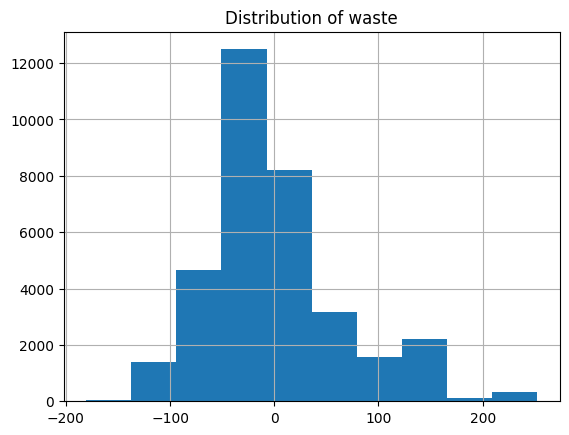

In [125]:
model_0.resid.hist()
plt.title('Distribution of waste')
plt.show()

Melhores residuos s√£o os perto de ZERO, portando estamos com muitos residuos

Obtendo o R¬≤ da previs√£o

In [126]:
# Importando o R¬≤ score

from sklearn.metrics import r2_score

In [129]:
# Definindo o Y da previs√£o

Y_predict = model_0.predict(X_test)


In [130]:
# Printando o R¬≤

print(f'R¬≤ -> {r2_score(Y_test,Y_predict)}')

R¬≤ -> 0.3434167744321316


O R¬≤ Do treino e da previs√£o dever ser parecidos, est√£o performando de uma forma igual.

**Basicamente 34% do pre√ßo previs√£o √© explicado pela vari√°vel room_type_Entire_home_apt**

***
Os outros 66% s√£o explicados por outros fatores
***

O modelo com apenas um fator nos mostrou um R¬≤ de 0.34, ou seja, aproximadamente 34% da varia√ß√£o observada no pre√ßos podem ser explicada pela varia√ß√£o de ser um apartamento inteiro ou n√£o. Isso indica que ainda h√° uma quantidade significativa de varia√ß√£o que n√£o est√° sendo capturada por esse modelo espec√≠fico. Vamos analisar outros fatores para explicar o pre√ßos

Vamos fazer mais tr√™s modelos, um com todas as vari√°veis e outra com as 5 vari√°veis, a outra com as 4 melhores vari√°veis retirando a coluna room_type_Entire_home_apt.
Para entendermos qual √© o melhor modelo

***
Vamos adicionar uma vari√°vel constante.

Pois a constante ùõΩ0 representa o valor de ùëå quando todas as vari√°veis independentes s√£o zero. Sem adicionar uma constante, o modelo assume que o intercepto √© zero, o que pode n√£o refletir a realidade dos dados e pode levar a um ajuste inadequado
***




In [131]:
# Importando a api do statsmodels para adcionarmos a constante

import statsmodels.api as sm

In [132]:
# Adicioandno a constante

X_train = sm.add_constant(X_train)

In [133]:
# Visualizando o data frame

X_train

const  minimum_nights  number_of_reviews last_review  \
32982    1.0             1.0                7.0  2019-06-19   
21265    1.0             2.0               23.0  2019-06-23   
32737    1.0             2.0               15.0  2019-05-27   
24871    1.0             6.0                0.0  2015-11-01   
43241    1.0             1.0                0.0  2017-12-15   
...      ...             ...                ...         ...   
9704     1.0             1.0               58.5  2019-06-16   
11190    1.0             1.0                0.0  2016-08-13   
26569    1.0            11.0                4.0  2019-05-24   
9256     1.0             2.0               58.5  2019-07-01   
41555    1.0             3.0                0.0  2013-10-10   

       calculated_host_listings_count  availability_365  \
32982                               1                 0   
21265                               1                 3   
32737                               1                 3   
24871                               1                 0   
43241                               1                 0   
...                               ...               ...   
9704                                1               290   
11190                               1                 0   
26569                              25               281   
9256                                1                14   
41555                               3               280   

       neighbourhood_group_Bronx  neighbourhood_group_Brooklyn  \
32982                          0                             0   
21265                          0                             1   
32737                          0                             1   
24871                          0                             1   
43241                          0                             1   
...                          ...                           ...   
9704                           0                             1   
11190                          0                             1   
26569                          0                             0   
9256                           0                             1   
41555                          0                             1   

       neighbourhood_group_Manhattan  neighbourhood_group_Queens  \
32982                              1                           0   
21265                              0                           0   
32737                              0                           0   
24871                              0                           0   
43241                              0                           0   
...                              ...                         ...   
9704                               0                           0   
11190                              0                           0   
26569                              1                           0   
9256                               0                           0   
41555                              0                           0   

       neighbourhood_group_Staten_Island  room_type_Entire_home_apt  \
32982                                  0                          0   
21265                                  0                          1   
32737                                  0                          0   
24871                                  0                          1   
43241                                  0                          1   
...                                  ...                        ...   
9704                                   0                          1   
11190                                  0                          0   
26569                                  0                          1   
9256                                   0                          0   
41555                                  0                          0   

       room_type_Private_room  room_type_Shared_room  
32982                  

Excluindo a coluna last_review. Por dois motivos, o formato em data n√£o √© bom para algoritmo de regress√£o.

Outro motivo √© que eu n√£o farei a convers√£o pois √© uma variavel que n√£o auxilia muito explicar a vari√°vel resposta


In [134]:
# Apagando a vari√°vel

X_train.drop(columns=['last_review'],inplace=True)

In [135]:
# Criando o modelo com todas as vari√°veis menos a last_review

all_cols_model = sm.OLS(Y_train, X_train).fit()

In [136]:
# Criando o modelo com as 4 melhores vari√°veis retirando a vari√°vel room_type_Entire home/apt
four_cols_model = sm.OLS(Y_train,
                         X_train[['const',
                                  'neighbourhood_group_Manhattan','calculated_host_listings_count',
                                  'availability_365','minimum_nights']]).fit()

In [137]:
# Criando o modelo com as 5 melhores vari√°veis

five_cols_model = sm.OLS(Y_train,
                         X_train[['const',
                                   'room_type_Entire_home_apt','neighbourhood_group_Manhattan',
                                  'calculated_host_listings_count','availability_365',
                                  'minimum_nights']]).fit()

***
Vamos conferir o resumo dos modelos
***

In [138]:
# Resumo do modelo com todas as colunas

print(all_cols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     2768.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:31:18   Log-Likelihood:            -1.8997e+05
No. Observations:               34226   AIC:                         3.800e+05
Df Residuals:                   34215   BIC:                         3.801e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [139]:
# Resumo do modelo com as 4 melhores vari√°veis

print(four_cols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     1313.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:31:18   Log-Likelihood:            -1.9767e+05
No. Observations:               34226   AIC:                         3.954e+05
Df Residuals:                   34221   BIC:                         3.954e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [140]:
# Resumo do modelo com as 5 melhores vari√°veis

print(five_cols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     5180.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:31:18   Log-Likelihood:            -1.9047e+05
No. Observations:               34226   AIC:                         3.810e+05
Df Residuals:                   34220   BIC:                         3.810e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

***
**`1. all_cols_model:`**


*   R-squared: 0.447
*   Adj. R-squared: 0.447
*   P-value: Baixo
*   A menor autovalor √© 5.73e-28








**An√°lise:**

R-squared de 0.447 indica que cerca de 44.7% da varia√ß√£o na vari√°vel dependente price √© explicada por esse modelo.

P-value baixo sugere que as vari√°veis no modelo s√£o estatisticamente significativas.

A mensagem sobre a menor autovalor (5.73e-28) sugere um problema s√©rio de multicolinearidade ou que a matriz de design √© singular. Isso significa que algumas vari√°veis independentes podem estar fortemente correlacionadas, causando instabilidade nos coeficientes estimados.

*Conclus√£o:* Apesar de um R-squared razo√°vel, a forte multicolinearidade √© uma preocupa√ß√£o. Talvez seja necess√°rio remover ou combinar vari√°veis para resolver esse problema.

***
**`2. four_cols_model:`**


*   R-squared: 0.133
*   Adj. R-squared: 0.133
*   P-value: Baixo


**An√°lise:**


R-squared de 0.133 indica que apenas 13.3% da varia√ß√£o em price √© explicada pelo modelo. Este valor √© relativamente baixo, sugerindo que o modelo n√£o captura bem a variabilidade dos dados.


P-value baixo indica que as vari√°veis no modelo s√£o significativas, mas isso n√£o √© suficiente para compensar o baixo R-squared.

Conclus√£o: Este modelo parece subajustar os dados. Pode n√£o ser uma boa op√ß√£o, pois n√£o explica bem a variabilidade da vari√°vel price.

***

**`3. five_cols_model:`**

*   R-squared: 0.431
*   Adj. R-squared: 0.431
*   P-value: Baixo


**An√°lise:**


R-squared de 0.431 mostra que cerca de 43.1% da varia√ß√£o em price √© explicada por esse modelo. Isso √© similar ao all_cols_model e indica que o modelo √© relativamente bom.


P-value baixo indica que as vari√°veis do modelo s√£o estatisticamente significativas.


Conclus√£o: Este modelo oferece uma boa explica√ß√£o da variabilidade da vari√°vel dependente e pode ser uma escolha robusta, especialmente por ele n√£o sofrer dos problemas de multicolinearidade encontrados no *all_cols_model*
***

